In [23]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import BSpline, make_interp_spline
from matplotlib.font_manager import FontProperties

In [24]:
def draw_plot(y):
    l = len(y)
    x = np.linspace(1, l, l)
    y = np.array(y)
    #plt. plot(x, y)
    x_new = np.linspace(1, l, 1000)
    a_BSpline = scipy.interpolate. make_interp_spline(x, y)
    y_new = a_BSpline(x_new)
    plt.plot(x_new, y_new)

In [25]:
def draw_plot2(signal, y, name):
    l1 = len(signal)
    l2 = len(y)
    x = np.linspace(1, l1, l2)
    y = np.array(y)
    plt. plot(x, y, "*")
    x_new = np.linspace(1, l1, 1000)
    a_BSpline = scipy.interpolate. make_interp_spline(x, y)
    y_new = a_BSpline(x_new)
    return(plt.plot(x_new, y_new, label=name))

In [26]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

### Single level Discrete Wavelets transform of 1-D signal:

In [27]:
# single level

import pywt
x = [3,7,1,1,-2,5,4,6]        #signal
cA, cD = pywt.dwt(x, 'haar')     #wavelets transform
y = pywt.idwt(cA, cD, 'haar')

print(cA)
print(cD)
print(y)

[7.07106781 1.41421356 2.12132034 7.07106781]
[-2.82842712  0.         -4.94974747 -1.41421356]
[ 3.  7.  1.  1. -2.  5.  4.  6.]


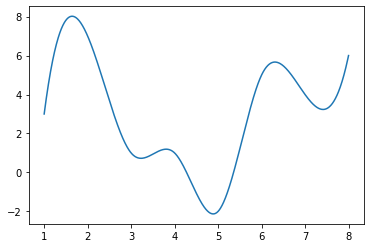

In [28]:
draw_plot(x)

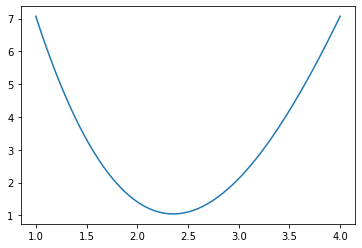

In [29]:
draw_plot(cA)

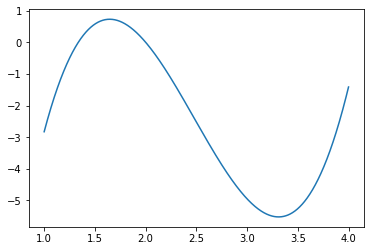

In [30]:
draw_plot(cD)

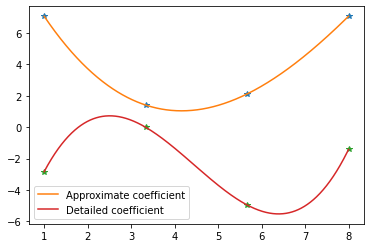

In [31]:
draw_plot2(x, cA, "Approximate coefficient")
draw_plot2(x, cD, "Detailed coefficient")
plt.legend()

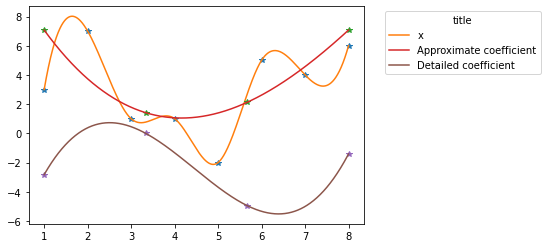

In [32]:
fontP = FontProperties()
fontP.set_size('medium')

p1, = draw_plot2(x, x, "x")
p2, = draw_plot2(x, cA, "Approximate coefficient")
p3, = draw_plot2(x, cD, "Detailed coefficient")
plt.legend(handles=[p1, p2, p3], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Multilevel Discrete Wavelets transform of 1-D signal:

In [33]:
# Multilevel

import pywt
x = [3,7,1,1,-2,5,4,6,6,4,5,-2,1,1,7,3]        #signal
coeffs = pywt.wavedec(x, 'db1', level=2, mode = 'periodic')     #wavelets transform DWT
cA2, cD2, cD1 = coeffs 

y = pywt.waverec(coeffs, 'db1', mode = 'periodic')    #IDWT

print("cA2 = ", cA2)
print("cD2 = ", cD2)
print("cD1 = ", cD1)

print("Reconstructed Signal = ", y)

cA2 =  [6.  6.5 6.5 6. ]
cD2 =  [ 4.  -3.5  3.5 -4. ]
cD1 =  [-2.82842712  0.         -4.94974747 -1.41421356  1.41421356  4.94974747
  0.          2.82842712]
Reconstructed Signal =  [ 3.  7.  1.  1. -2.  5.  4.  6.  6.  4.  5. -2.  1.  1.  7.  3.]


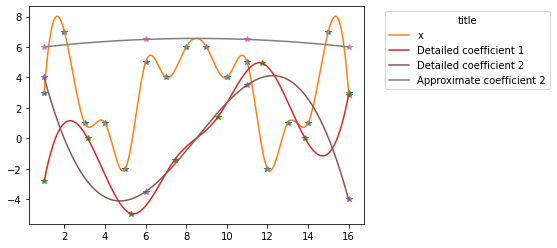

In [34]:
fontP = FontProperties()
fontP.set_size('medium')

p1, = draw_plot2(x, x, "x")
p2, = draw_plot2(x, cD1, "Detailed coefficient 1")
p3, = draw_plot2(x, cD2, "Detailed coefficient 2")
p4, = draw_plot2(x, cA2, "Approximate coefficient 2")
plt.legend(handles=[p1, p2,p3,p4], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)